## PRE MODELING

<b> Understanding objective and deriving the Business problem </b>
- We have to predict the Price of a Car
- We also have to understand what drives the Price of the car as per this data
- We are presuming that this data belongs to a caountry - XYZ
- So we will also be understanding the customer's behaviour in these markets

<b> Validate the Problem </b>
- No Validation required because we simply have to predict the price.
- However, for validation we will calculate the coeff of variance in the Price.

**Convert Business Problem to Stats problem by defining possible X and Y, type of stat problem**

- We have to problems - Predicting the Price and the Sales
- Initially we start off with the Y as the Price
- We later can also create a seperate model where the Y will be the Sales
- As Price is a Numeric variable, we are dealing with a Regression Problem
- Because we want to understand the drivers in detail (high interpretability required), we will go with Linear Regression

**Understand the data is required**
- Any data that we think that can impact the price of a car
- In the data we already have a number of predictors (X variables)

**DATA AUDIT REPORT**
- We simply use the pandas profiling to come up with a report

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

In [2]:
df = pd.read_csv('Car_sales.csv')

In [5]:
Audit_Report_CarSales = pandas_profiling.ProfileReport(df)

In [6]:
profile_report.to_file('Audit_Report_CarSales.html')

## MODELING

### (1) Select Algorithm

**Convert Business Problem to Stat Problem and based on the Stat problem at hand, select the algorithm**
- Regression Problem : Linear Regression

**The choice of the algorithm may also depend upon the specific requirement of the client i.e. Business Problem**
- high interpretability required, therefore, Linear Regression

### (2) Data Preparation I

**Convert data types**

In [8]:
df.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [12]:
df.Latest_Launch = pd.to_datetime(df.Latest_Launch)

**Changing the column names as per pythonic conventions**
- No such need as they already are as per python norms

In [13]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

**Replace special characters with right/meaningful values**
- No such characters identified

**Perform Missing Value Treatment and Perform Outlier Capping**

In [15]:
df.dtypes

Manufacturer                      object
Model                             object
Sales_in_thousands               float64
four_year_resale_value           float64
Vehicle_type                      object
Price_in_thousands               float64
Engine_size                      float64
Horsepower                       float64
Wheelbase                        float64
Width                            float64
Length                           float64
Curb_weight                      float64
Fuel_capacity                    float64
Fuel_efficiency                  float64
Latest_Launch             datetime64[ns]
Power_perf_factor                float64
dtype: object

**(Optional) Drop the missing values (rows) as per the Y variable**

In [18]:
df.Price_in_thousands.isnull().value_counts()

False    155
True       2
Name: Price_in_thousands, dtype: int64

In [ ]:
# df.dropna(subset=["Price_in_thousands"],axis=0)

In [276]:
df.dropna(subset=["Price_in_thousands"],axis=0)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2012-02-27,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,2011-06-28,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2012-01-29,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,2011-04-04,83.998724
10,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,2011-11-02,71.181451


**Perform Missing Value Imputation**

###### Diving the dataset based on the data type

In [28]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
date_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['datetime64[ns]']]

In [29]:
numeric_var_names

['Sales_in_thousands',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [30]:
cat_var_names

['Manufacturer', 'Model', 'Vehicle_type']

In [31]:
date_var_names

['Latest_Launch']

In [32]:
df_num = df[numeric_var_names]

In [33]:
df_cat = df[cat_var_names]

In [34]:
df_date = df[date_var_names]

In [40]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

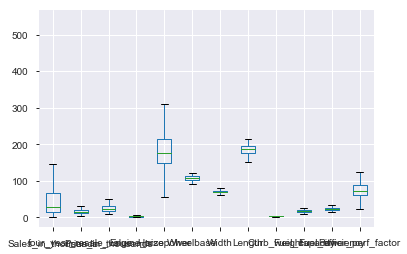

In [41]:
df_num.plot(kind="box")

In [42]:
def outlier_miss_treat(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    x = x.fillna(x.median())
    return (x)

In [43]:
def miss_treat_cat(x):
    x = x.fillna(x.mode().iloc[0])
    return x

In [44]:
df_num = df_num.apply(outlier_miss_treat)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
df_num.count()

Sales_in_thousands        157
four_year_resale_value    157
Price_in_thousands        157
Engine_size               157
Horsepower                157
Wheelbase                 157
Width                     157
Length                    157
Curb_weight               157
Fuel_capacity             157
Fuel_efficiency           157
Power_perf_factor         157
dtype: int64

In [50]:
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639


**Binning and Encoding**

In [54]:
df_cat.Manufacturer.value_counts()

Ford          11
Dodge         11
Mercedes-B     9
Toyota         9
Chevrolet      9
Mitsubishi     7
Nissan         7
Chrysler       7
Pontiac        6
Volkswagen     6
Mercury        6
Oldsmobile     6
Volvo          6
Lexus          6
Honda          5
Saturn         5
Cadillac       5
Plymouth       4
Buick          4
Acura          4
Hyundai        3
Audi           3
Porsche        3
Lincoln        3
Jeep           3
BMW            3
Saab           2
Subaru         2
Infiniti       1
Jaguar         1
Name: Manufacturer, dtype: int64

In [55]:
del df_cat['Model']

In [60]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)

In [61]:
df_treated = pd.concat([df_num, df_cat_dummy],axis=1)

In [63]:
df_treated.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


## Data Preparation Level II (Determining Assumptions)

**Checking if Y follows a normal distribution**

In [65]:
import seaborn as sns

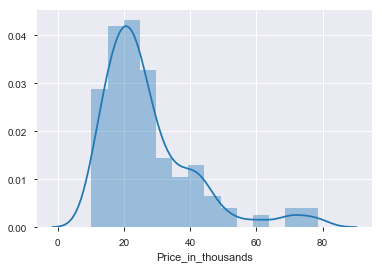

In [67]:
sns.distplot(df_treated.Price_in_thousands)

In [68]:
df_treated.Price_in_thousands.skew()  ## Right Skewed

1.6810328564253787

In [69]:
df_treated.Price_in_thousands.kurtosis() ## Leptokurtic

3.0879889141585806

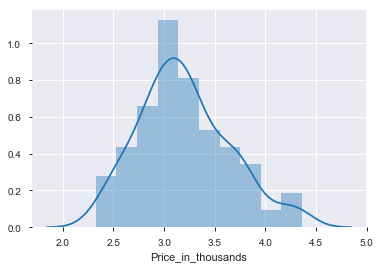

In [71]:
sns.distplot(np.log(df_treated.Price_in_thousands))

In [72]:
np.log(df_treated.Price_in_thousands).skew()  ## skewness decreased

0.47027776149585027

In [74]:
np.log(df_treated.Price_in_thousands).kurtosis() ## Leptokurtic is not as much as before

-0.05241855421030417

In [76]:
df_treated['ln_Price_in_thousands'] = np.log(df_treated.Price_in_thousands)

## We are able to get a nomral Y by taking the log of Y

**There should be correlation between x and Y variable**

In [79]:
df_num.corrwith(np.log(df_num.Price_in_thousands))

## Corr is existing between the X vars and the Y var

Sales_in_thousands       -0.373347
four_year_resale_value    0.737381
Price_in_thousands        0.958410
Engine_size               0.660973
Horsepower                0.885087
Wheelbase                 0.207237
Width                     0.400917
Length                    0.248849
Curb_weight               0.628037
Fuel_capacity             0.500359
Fuel_efficiency          -0.589579
Power_perf_factor         0.925537
dtype: float64

**There should be no multicollinearity**

In [81]:
corrm=df_num.corr()

In [83]:
df_num.corr()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.277375,-0.360085,-0.014355,-0.259332,0.278261,0.092996,0.201007,-0.035062,0.044389,0.036851,-0.284396
four_year_resale_value,-0.277375,1.000000,0.793482,0.433034,0.650285,-0.040888,0.165259,0.040030,0.276207,0.268711,-0.341003,0.698053
Price_in_thousands,-0.360085,0.793482,1.000000,0.617601,0.847967,0.118272,0.328579,0.157225,0.526211,0.431413,-0.507150,0.906761
Engine_size,-0.014355,0.433034,0.617601,1.000000,0.814995,0.518433,0.702596,0.576364,0.793321,0.698313,-0.757120,0.796531
Horsepower,-0.259332,0.650285,0.847967,0.814995,1.000000,0.325276,0.538193,0.420399,0.637164,0.526638,-0.610719,0.989786
Wheelbase,0.278261,-0.040888,0.118272,0.518433,0.325276,1.000000,0.681390,0.837535,0.656884,0.659692,-0.498976,0.288849
Width,0.092996,0.165259,0.328579,0.702596,0.538193,0.681390,1.000000,0.700024,0.710129,0.648637,-0.584584,0.506919
Length,0.201007,0.040030,0.157225,0.576364,0.420399,0.837535,0.700024,1.000000,0.622352,0.561758,-0.418688,0.370331
Curb_weight,-0.035062,0.276207,0.526211,0.793321,0.637164,0.656884,0.710129,0.622352,1.000000,0.868023,-0.829389,0.629211
Fuel_capacity,0.044389,0.268711,0.431413,0.698313,0.526638,0.659692,0.648637,0.561758,0.868023,1.000000,-0.821330,0.522210


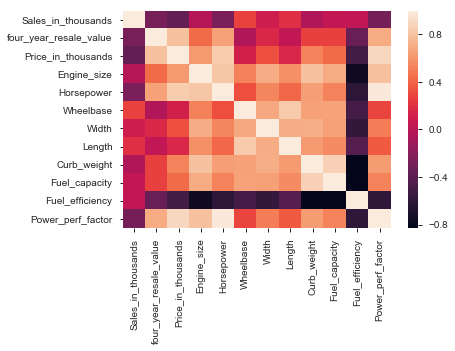

In [82]:
# visualize correlation matrix in Seaborn using a heatmap

sns.heatmap(df_num.corr())

## There are features that are mildly correlated to each other therefore a LR Model is possible

## Data Preparation III (Feature Engineering – Feature Reduction)

In [85]:
features = df_treated[df_treated.columns.difference(['Price_in_thousands', 'ln_Price_in_thousands'])]

In [86]:
target = df_treated['ln_Price_in_thousands']

**RFE**

In [89]:
from sklearn.feature_selection import RFE

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
### Initlaize the Linear Regression Model

lm = LinearRegression()

In [92]:
### Initlalzing the RFE Model

rfe = RFE(lm, n_features_to_select=10)

In [93]:
## Fit the RFE Model

rfe = rfe.fit(features, target)

In [97]:
bool_RFE = rfe.get_support()

In [99]:
len(bool_RFE)

41

In [101]:
features.shape

(157, 41)

In [104]:
list(features.loc[:,bool_RFE].columns)

['Manufacturer_Chevrolet',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Hyundai',
 'Manufacturer_Jeep',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Saturn',
 'Manufacturer_Toyota',
 'Manufacturer_Volkswagen']

**F Regression (Univariate Regression)**

In [89]:
from sklearn.feature_selection import RFE

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
### Initlaize the Linear Regression Model

lm = LinearRegression()

In [92]:
### Initlalzing the RFE Model

rfe = RFE(lm, n_features_to_select=10)

In [93]:
## Fit the RFE Model

rfe = rfe.fit(features, target)

In [97]:
bool_RFE = rfe.get_support()

In [99]:
len(bool_RFE)

41

In [101]:
features.shape

(157, 41)

In [105]:
from sklearn.feature_selection import f_regression

In [107]:
F_values, p_values  = f_regression(features, target)

In [116]:
F_values = pd.Series(F_values, name='F_values')
p_values = pd.Series(p_values, name='p_values')
col_names = pd.Series(features.columns,name='col_names')

In [117]:
f_result = pd.concat([col_names,F_values,p_values],axis=1)

In [148]:
list(f_result.sort_values(by=["F_values"], ascending=False).head(10).col_names)

['Power_perf_factor',
 'Horsepower',
 'four_year_resale_value',
 'Engine_size',
 'Curb_weight',
 'Fuel_efficiency',
 'Fuel_capacity',
 'Width',
 'Manufacturer_Mercedes-B',
 'Sales_in_thousands']

**Select K Best**

In [125]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [126]:
## Initalize the K Best Model

selector = SelectKBest(f_classif, k=10)

In [127]:
### Fit the model

selector.fit(features, target)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SelectKBest(k=10, score_func=<function f_classif at 0x0000027405DFDB70>)

In [128]:
K_Best = features.columns[selector.get_support()]

In [130]:
list(K_Best)

['Manufacturer_Mitsubishi',
 'Manufacturer_Oldsmobile',
 'Manufacturer_Pontiac',
 'Manufacturer_Porsche',
 'Manufacturer_Saab',
 'Manufacturer_Saturn',
 'Manufacturer_Subaru',
 'Manufacturer_Toyota',
 'Manufacturer_Volkswagen',
 'Manufacturer_Volvo']

**Corr between X and Y**

In [132]:
df_num.corrwith(np.log(df_num.Price_in_thousands))

Sales_in_thousands       -0.373347
four_year_resale_value    0.737381
Price_in_thousands        0.958410
Engine_size               0.660973
Horsepower                0.885087
Wheelbase                 0.207237
Width                     0.400917
Length                    0.248849
Curb_weight               0.628037
Fuel_capacity             0.500359
Fuel_efficiency          -0.589579
Power_perf_factor         0.925537
dtype: float64

In [133]:
selected_vars_corr_X_Y = ['Power_perf_factor',
'Horsepower',
'four_year_resale_value',
'Engine_size',
'Curb_weight',
'Fuel_efficiency',
'Fuel_capacity',
'Width']


In [134]:
selected_vars_corr_X_Y

['Power_perf_factor',
 'Horsepower',
 'four_year_resale_value',
 'Engine_size',
 'Curb_weight',
 'Fuel_efficiency',
 'Fuel_capacity',
 'Width']

**Features to DROP as per Insights and Corr between X and X**

**VIF**

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
from patsy import dmatrices

In [138]:
VIF = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]

In [140]:
VIF = pd.Series(VIF, name='VIF')

In [141]:
cols = pd.Series(features.columns, name='Column_Name')

In [142]:
VIF_res = pd.concat([cols,VIF],axis=1)

In [147]:
list(VIF_res.sort_values(by=['VIF']).head(10).Column_Name)

['Manufacturer_Infiniti',
 'Manufacturer_Jaguar',
 'Manufacturer_Subaru',
 'Manufacturer_Saab',
 'Manufacturer_BMW',
 'Manufacturer_Hyundai',
 'Manufacturer_Audi',
 'Manufacturer_Lincoln',
 'Manufacturer_Buick',
 'Manufacturer_Jeep']

In [149]:
{'Manufacturer_Chevrolet',
'Manufacturer_Ford',
'Manufacturer_Honda',
'Manufacturer_Hyundai',
'Manufacturer_Jeep',
'Manufacturer_Plymouth',
'Manufacturer_Porsche',
'Manufacturer_Saturn',
'Manufacturer_Toyota',
'Manufacturer_Volkswagen',
'Power_perf_factor',
'Horsepower',
'four_year_resale_value',
'Engine_size',
'Curb_weight',
'Fuel_efficiency',
'Fuel_capacity',
'Width',
'Manufacturer_Mercedes-B',
'Sales_in_thousands',
'Manufacturer_Mitsubishi',
'Manufacturer_Oldsmobile',
'Manufacturer_Pontiac',
'Manufacturer_Porsche',
'Manufacturer_Saab',
'Manufacturer_Saturn',
'Manufacturer_Subaru',
'Manufacturer_Toyota',
'Manufacturer_Volkswagen',
'Manufacturer_Volvo',
'Power_perf_factor',
'Horsepower',
'four_year_resale_value',
'Engine_size',
'Curb_weight',
'Fuel_efficiency',
'Fuel_capacity',
'Width',
'Manufacturer_Infiniti',
'Manufacturer_Jaguar',
'Manufacturer_Subaru',
'Manufacturer_Saab',
'Manufacturer_BMW',
'Manufacturer_Hyundai',
'Manufacturer_Audi',
'Manufacturer_Lincoln',
'Manufacturer_Buick',
'Manufacturer_Jeep'}

{'Curb_weight',
 'Engine_size',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Horsepower',
 'Manufacturer_Audi',
 'Manufacturer_BMW',
 'Manufacturer_Buick',
 'Manufacturer_Chevrolet',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Hyundai',
 'Manufacturer_Infiniti',
 'Manufacturer_Jaguar',
 'Manufacturer_Jeep',
 'Manufacturer_Lincoln',
 'Manufacturer_Mercedes-B',
 'Manufacturer_Mitsubishi',
 'Manufacturer_Oldsmobile',
 'Manufacturer_Plymouth',
 'Manufacturer_Pontiac',
 'Manufacturer_Porsche',
 'Manufacturer_Saab',
 'Manufacturer_Saturn',
 'Manufacturer_Subaru',
 'Manufacturer_Toyota',
 'Manufacturer_Volkswagen',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Sales_in_thousands',
 'Width',
 'four_year_resale_value'}

In [155]:
final_vars = ['Curb_weight',
 'Engine_size',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Manufacturer_Audi',
 'Manufacturer_BMW',
 'Manufacturer_Buick',
 'Manufacturer_Chevrolet',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Hyundai',
 'Manufacturer_Infiniti',
 'Manufacturer_Jaguar',
 'Manufacturer_Jeep',
 'Manufacturer_Lincoln',
 'Manufacturer_Mercedes-B',
 'Manufacturer_Mitsubishi',
 'Manufacturer_Oldsmobile',
 'Manufacturer_Plymouth',
 'Manufacturer_Pontiac',
 'Manufacturer_Porsche',
 'Manufacturer_Saab',
 'Manufacturer_Saturn',
 'Manufacturer_Subaru',
 'Manufacturer_Toyota',
 'Manufacturer_Volkswagen',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Width']

In [156]:
len(final_vars)

29

In [153]:
df_treated.shape

(157, 43)

In [157]:
features_reduced = features[final_vars]

In [159]:
features_reduced.head()

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Chevrolet,Manufacturer_Ford,Manufacturer_Honda,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Width
0,2.639,1.8,13.2,28.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,58.280150,67.3
1,3.517,3.2,17.2,25.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,91.370778,70.3
2,3.470,3.2,17.2,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,72.030917,70.6
3,3.850,3.5,18.0,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,91.389779,71.4
4,2.998,1.8,16.4,27.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,62.777639,68.2


In [161]:
target_both = df_treated[['Price_in_thousands','ln_Price_in_thousands']]

In [162]:
df_final = pd.concat([features_reduced,target_both],axis=1)

In [164]:
df_final.head()

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Chevrolet,Manufacturer_Ford,Manufacturer_Honda,...,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Width,Price_in_thousands,ln_Price_in_thousands
0,2.639,1.8,13.2,28.0,0,0,0,0,0,0,...,0,0,0,0,0,0,58.280150,67.3,21.500,3.068053
1,3.517,3.2,17.2,25.0,0,0,0,0,0,0,...,0,0,0,0,0,0,91.370778,70.3,28.400,3.346389
2,3.470,3.2,17.2,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,72.030917,70.6,22.799,3.126717
3,3.850,3.5,18.0,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,91.389779,71.4,42.000,3.737670
4,2.998,1.8,16.4,27.0,1,0,0,0,0,0,...,0,0,0,0,0,0,62.777639,68.2,23.990,3.177637


##### Extra Step : Checking for the column names python convention

In [171]:
df_final.columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Chevrolet', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_Infiniti', 'Manufacturer_Jaguar',
       'Manufacturer_Jeep', 'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mitsubishi', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Width', 'Price_in_thousands',
       'ln_Price_in_thousands'],
      dtype='object')

In [ ]:
Manufacturer_Mercedes-B
space

In [173]:
df_final.columns = df_final.columns.str.replace("-","_")

In [174]:
df_final.columns = df_final.columns.str.replace(" ","")

In [175]:
df_final.columns 

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Chevrolet', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_Infiniti', 'Manufacturer_Jaguar',
       'Manufacturer_Jeep', 'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mitsubishi', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Width', 'Price_in_thousands',
       'ln_Price_in_thousands'],
      dtype='object')

### Data Preparation IV (Resampling data) (Hold-One-Out Cross Validation)

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
train, test = train_test_split(df_final, test_size = 0.3, random_state = 1234)

In [178]:
train.shape

(109, 31)

In [179]:
test.shape

(48, 31)

In [180]:
y = 'ln_Price_in_thousands'

s = str()

for i in train.columns.tolist():
    s = s + '+' + i

equation = s[1:]

equation = equation.replace("+ln_Price_in_thousands","")

equation = y + "~" + equation

equation = equation.replace("+Price_in_thousands","")

equation

'ln_Price_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Chevrolet+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lincoln+Manufacturer_Mercedes_B+Manufacturer_Mitsubishi+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Width'

In [215]:
equation = "ln_Price_in_thousands~Curb_weight+Engine_size+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Mercedes_B+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Volvo+Power_perf_factor"

In [216]:
import statsmodels.formula.api as smf

In [217]:
## Initalise the model and then fit the model

model = smf.ols(equation, data=train).fit()

In [218]:
### Printing the model summary

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Price_in_thousands   R-squared:                       0.927
Model:                               OLS   Adj. R-squared:                  0.920
Method:                    Least Squares   F-statistic:                     139.8
Date:                   Thu, 13 Feb 2020   Prob (F-statistic):           3.48e-52
Time:                           11:49:49   Log-Likelihood:                 84.619
No. Observations:                    109   AIC:                            -149.2
Df Residuals:                         99   BIC:                            -122.3
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
################

In [245]:
equation2 = "ln_Price_in_thousands~Curb_weight+Engine_size+Power_perf_factor+Fuel_efficiency"

In [246]:
import statsmodels.formula.api as smf

In [247]:
## Initalise the model and then fit the model

model = smf.ols(equation2, data=train).fit()

In [248]:
### Printing the model summary

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Price_in_thousands   R-squared:                       0.902
Model:                               OLS   Adj. R-squared:                  0.899
Method:                    Least Squares   F-statistic:                     240.1
Date:                   Thu, 13 Feb 2020   Prob (F-statistic):           1.43e-51
Time:                           11:57:04   Log-Likelihood:                 68.706
No. Observations:                    109   AIC:                            -127.4
Df Residuals:                        104   BIC:                            -114.0
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

# POST MODELING

## Model Validation

#### Predciting the Y on the train dataset

In [249]:
train['pred'] = np.exp(model.predict(train))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [250]:
train[['Price_in_thousands','pred']].head()

,Price_in_thousands,pred
24,45.7050,52.220419
99,78.4798,69.962795
8,33.4000,27.559051
20,16.5350,18.822701
22,19.3900,19.959697


In [251]:
test['pred'] = pd.DataFrame(np.exp(model.predict(test)))
test.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Chevrolet,Manufacturer_Ford,Manufacturer_Honda,...,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Width,Price_in_thousands,ln_Price_in_thousands,pred
58,2.932,2.3,17.1,27.0,0,0,0,0,0,1,...,0,0,0,0,0,54.269548,70.3,15.350,2.731115,16.321128
91,3.944,3.3,20.0,21.0,0,0,0,0,0,0,...,0,0,0,0,0,69.671461,74.9,22.510,3.113960,22.602013
98,3.213,3.2,16.4,26.0,0,0,0,0,0,0,...,0,0,0,0,0,92.925792,67.8,41.600,3.728100,31.213319
29,3.332,2.5,16.0,24.0,0,0,0,0,0,0,...,0,0,0,0,0,69.521355,69.2,24.495,3.198469,23.301687
6,3.902,4.2,23.7,21.0,1,0,0,0,0,0,...,0,0,0,0,0,134.656858,74.0,62.000,4.127134,68.935400


## Model Evaluation

In [252]:
from sklearn import metrics
import scipy.stats as stats

#### Train Evaluation

In [253]:
MAPE_train = round(np.mean(np.abs((train.Price_in_thousands - train.pred)/train.Price_in_thousands))*100,2)
print('MAPE_train',MAPE_train)

RMSE_train = metrics.mean_squared_error(train.Price_in_thousands , train.pred)
print('RMSE_train',RMSE_train)

Corr_train = stats.stats.pearsonr(train.Price_in_thousands , train.pred)
print('Corr_train',Corr_train)

MAPE_train 10.3
RMSE_train 16.56562844539278
Corr_train (0.940325474074574, 6.583179088624372e-52)


#### Test Evaluation

In [254]:
MAPE_test = round(np.mean(np.abs((test.Price_in_thousands - test.pred)/test.Price_in_thousands))*100,2)
print('MAPE_test',MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Price_in_thousands , test.pred)
print('RMSE_test',RMSE_test)

Corr_test = stats.stats.pearsonr(test.Price_in_thousands , test.pred)
print('Corr_test',Corr_test)

MAPE_test 11.79
RMSE_test 31.155488317673502
Corr_test (0.9539437541699369, 1.0824341873962307e-25)


#### Decile Analysis

In [257]:
# Creating the values of train

In [258]:
#Decile analysis - Train

train['Deciles']=pd.qcut(train['pred'],10, labels=False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [259]:
avg_actual = train[['Deciles','Price_in_thousands']].groupby(train.Deciles).mean().sort_index(ascending=False)['Price_in_thousands']

In [260]:
avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

In [261]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

In [262]:
Decile_analysis_train = Decile_analysis_train.reset_index()

In [263]:
# Creating the values of test

test['Deciles']=pd.qcut(test['pred'],10, labels=False)

avg_actual_test = test[['Deciles','Price_in_thousands']].groupby(test.Deciles).mean().sort_index(ascending=False)['Price_in_thousands']
avg_pred_test = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [264]:
Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

In [265]:
Decile_analysis_test = Decile_analysis_test.reset_index()

In [268]:
Decile_analysis_test

,Deciles,Price_in_thousands,pred
0,9,69.48300,65.141375
1,8,48.13360,41.913683
2,7,31.71880,33.017785
3,6,36.77250,29.025756
4,5,23.90020,25.510046
5,4,20.78500,21.810400
6,3,19.00875,19.780111
7,2,17.99900,17.636829
8,1,15.58480,16.210743
9,0,14.21700,14.407396


In [272]:
df_treated[['Curb_weight','Engine_size','Power_perf_factor','Fuel_efficiency','Price_in_thousands']]

,Curb_weight,Engine_size,Power_perf_factor,Fuel_efficiency,Price_in_thousands
0,2.63900,1.800,58.280150,28.0,21.50000
1,3.51700,3.200,91.370778,25.0,28.40000
2,3.47000,3.200,72.030917,26.0,22.79900
3,3.85000,3.500,91.389779,22.0,42.00000
4,2.99800,1.800,62.777639,27.0,23.99000
5,3.56100,2.800,84.565105,22.0,33.95000
6,3.90200,4.200,134.656858,21.0,62.00000
7,3.17900,2.500,71.191207,26.0,26.99000
8,3.19700,2.800,81.877069,24.0,33.40000
9,3.47200,2.800,83.998724,25.0,38.90000
